In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib,statsmodels,seaborn

ModuleNotFoundError: No module named 'watermark'

In [2]:
import warnings
warnings.filterwarnings('ignore')


# **<선형 회귀분석 실습>**


#### 설치가 필요한 라이브러리

statsmodels, seaborn;patsy(의존성), scikit-learn
이상 3가지 라이브러리 설치가 요구됩니다.


기본적으로 sklearn에서 제공하는 linear_model 클래스를 통해서 회귀분석을 학습이 가능합니다.

__sklearn.linear_model.LinearRegression:__ 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

###### <font color='red'>scikit-learn</font>: Python 언어를 통한 머신러닝의 대부분을 손쉽게 사용가능하도록, numpy와 scipy를 기반을 작성된 라이브러리.
이를 통해서 간단하게 회귀분석을 실습해 보도록 하겠습니다.



### 데이터 불러오기

scikit-learn의 예제 데이터(주택가격예측:Boston_data)를 활용해서 회귀를 수행해보도록 하겠습니다.

In [3]:
import os
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab

#### 기본적으로 sklearn에서 제공하는 linear_model 클래스를 통해서 회귀분석을 학습이 가능합니다.

sklearn.linear_model.LinearRegression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

scikit-learn: Python 언어를 통한 머신러닝의 대부분을 손쉽게 사용가능하도록, numpy와 scipy를 기반을 작성된 라이브러리.
이를 통해서 간단하게 회귀분석을 실습해 보도록 하겠습니다.


### **예제 데이터 불러오기**

Text(0, 0.5, 'Price ($/Mbyte)')

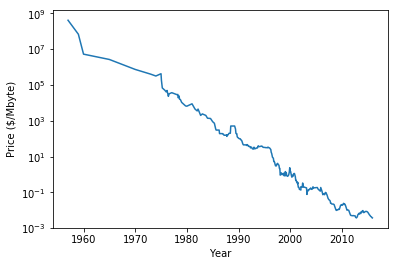

In [4]:
ram_prices = pd.read_csv('./data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

Text(0, 0.5, 'Raw Price')

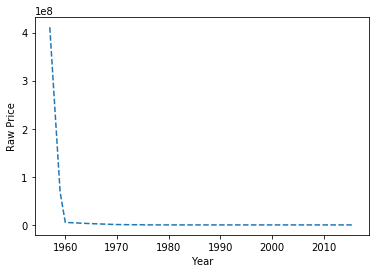

In [5]:
plt.plot(ram_prices.date,ram_prices.price,'--')
plt.xlabel('Year')
plt.ylabel('Raw Price')

### sklearn.linear_model.LinearRegression( )함수를 이용해서 선형회귀를 수행해보겠습니다. 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

<img src='./fig/17.png'>

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_lr = np.exp(pred_lr)

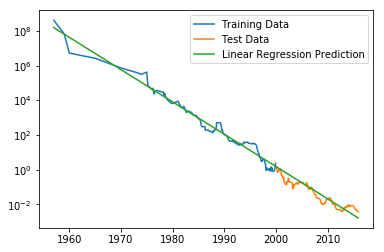

In [8]:

plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()

##### 회귀계수 확인해보기


In [9]:
linear_reg.coef_
print('연도에 따른 회귀계수(로그변환):', linear_reg.coef_)

연도에 따른 회귀계수(로그변환): [-0.42880156]


<img src='./fig/18.png'>

### **데이터 불러오기**

예제 데이터(주택가격예측:Boston_data)를 활용해서 회귀를 수행해보도록 하겠습니다.
처음에는 회귀분석을 위한 파이썬 라이브러리는 크게 sckit-learn 과 statsmodels가 있습니다.
statsmodels의 경우, 통계기반의 다양한 회귀분석 모형에 특화된 패키지입니다. 
scikit-learn의 경우, 다양한 기계학습 방법론을 통합하여 제공하는 패키지 입니다.
우선, statsmodels 패키지를 활용하여 선형 회귀분석의 다양한 결과를 도출하고 해석하는 방법을 실습해 보도록 하겠습니다.

In [10]:
# 현재경로 확인
os.getcwd()

'/media/seok/SSD2/dev/Lecture/3day_Regression&Logistic_Programing_Lecture_0709/3day_Regression&Logistic_Programing_Lecture'

## Boston House Dataset : https://www.kaggle.com/c/boston-housing

- CRIM: 자치시(town) 별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 거주지역의 비율 
- INDUS: 비소매상업지역이 점유하고 있는 토지의 비율  
- CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
- NOX: 10ppm 당 농축 일산화질소  
- RM: 주택 1가구당 평균 방의 개수  
- AGE: 1940년 이전에 건축된 소유주택의 비율  
- DIS: 5개의 보스턴 직업센터까지의 접근성 지수  
- RAD: 방사형 도로까지의 접근성 지수  
- TAX: 10,000 달러 당 재산세율  
- PTRATIO: 자치시(town)별 학생/교사 비율  
- B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
- LSTAT: 모집단의 하위계층의 비율(%)  
- MEDV: 본인 소유의 주택가격(중앙값) (단위: $1,000)


In [11]:
# 데이터 불러오기
boston = pd.read_csv("./data/boston_house.csv")
print(boston.head())

    AGE       B     RM     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90  6.575  0.00632  4.0900   2.31   4.98  0.538     15.3    1   
1  78.9  396.90  6.421  0.02731  4.9671   7.07   9.14  0.469     17.8    2   
2  61.1  392.83  7.185  0.02729  4.9671   7.07   4.03  0.469     17.8    2   
3  45.8  394.63  6.998  0.03237  6.0622   2.18   2.94  0.458     18.7    3   
4  54.2  396.90  7.147  0.06905  6.0622   2.18   5.33  0.458     18.7    3   

     ZN  TAX  CHAS  Target  
0  18.0  296     0    24.0  
1   0.0  242     0    21.6  
2   0.0  242     0    34.7  
3   0.0  222     0    33.4  
4   0.0  222     0    36.2  


In [12]:
##### EDA
# Data format
print("number of observation in data : {}".format(boston.shape[0]))
print("number of Variables in Data  : {}".format(boston.shape[1]))

number of observation in data : 506
number of Variables in Data  : 14


In [13]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [14]:
boston_target = boston['Target']
# boston_target

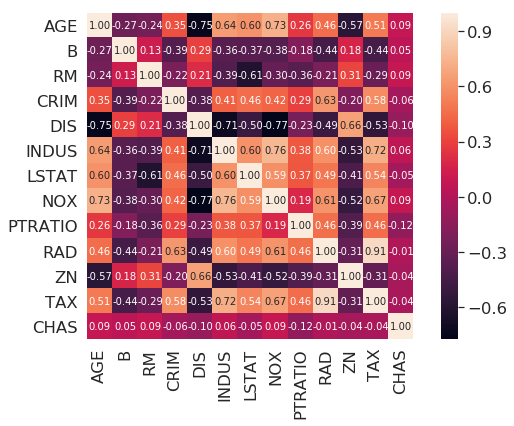

In [15]:
# correlation analysis
colnames = list(boston_data.columns.values)
X_cm = np.corrcoef(boston_data[colnames].values.T)
sns.set(font_scale=1.5)

plt.figure(figsize=(10,6))
X_hm = sns.heatmap(X_cm, cbar=True, annot=True, square=True, fmt='.2f',
                         annot_kws={'size':10},yticklabels=colnames,xticklabels=colnames)
plt.show()

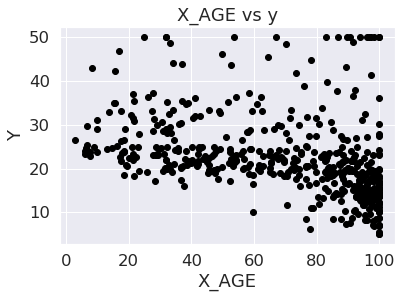

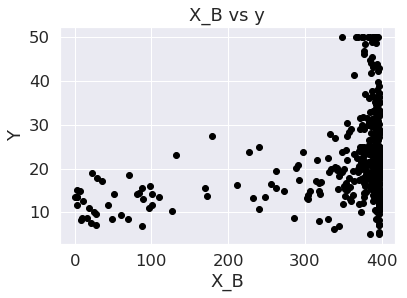

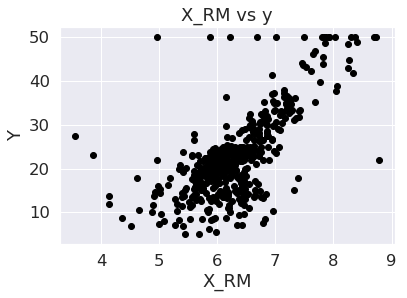

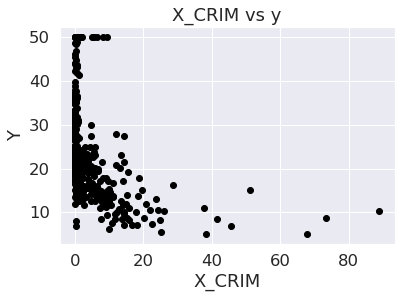

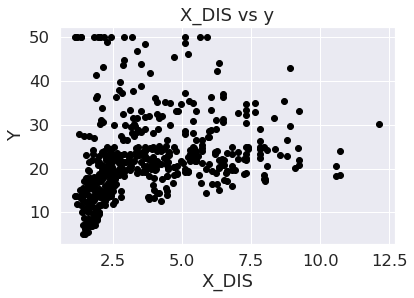

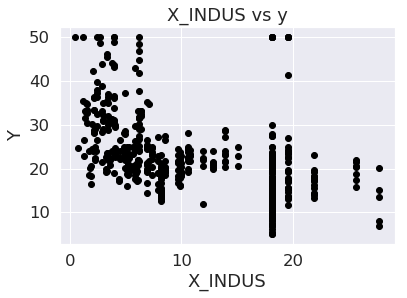

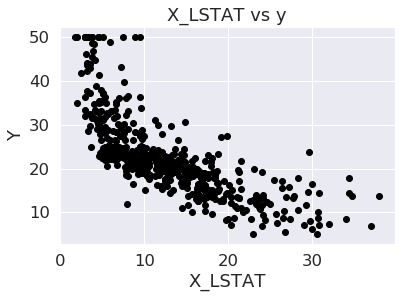

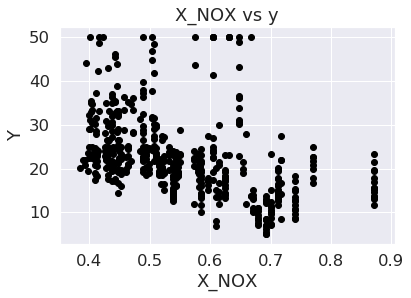

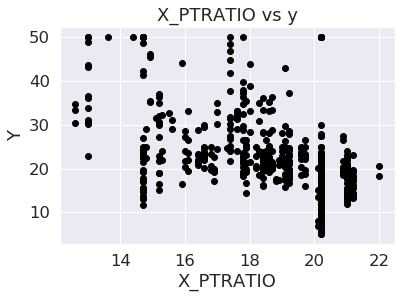

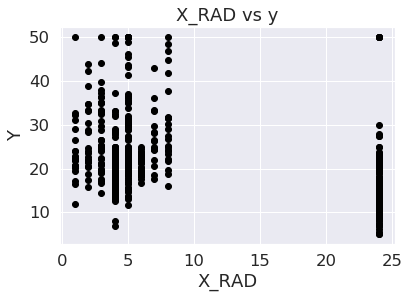

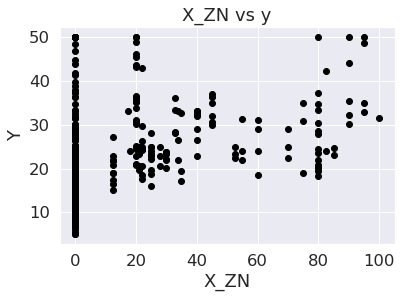

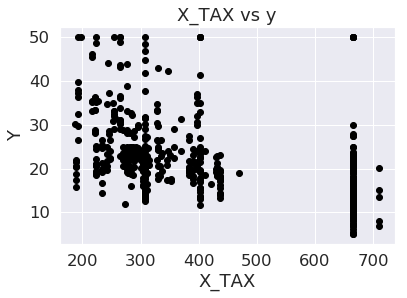

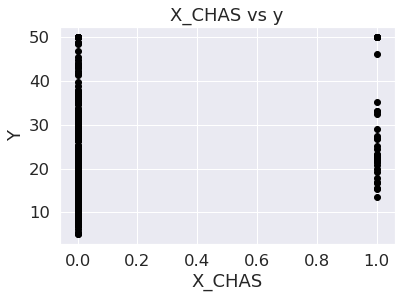

In [16]:
# each X vs Y
for i in range(0,len(colnames)):
    plt.scatter(boston_data.iloc[:,i], boston_target,  color='black')
    plt.title('X_{} vs y'.format(colnames[i]))
    plt.xlabel('X_{}'.format(colnames[i]))
    plt.ylabel('Y')
    plt.show()

### **<학습데이터와 검증데이터로 나누기>**

<img src='./fig/24.png'>

<img src='./fig/23.png'>

In [17]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)



## **<파이썬 기반의 통계학 라이브러리 Statsmodels를 활용한 회귀모형 적합을 수행해보자>**

Statmodels : https://www.statsmodels.org/dev/regression.html#model-classes

<img src='./fig/21.png'>

<img src='./fig/19.png'>

In [18]:
# Training the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)

<img src='./fig/20.png'>

In [19]:
lm_trained = lm.fit()

In [20]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     743.4
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          3.73e-241
Time:                        21:29:59   Log-Likelihood:                -1032.9
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     341   BIC:                             2142.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0266      0.015     -1.750      0.081      -0.056       0.003
B              0.0135      0.003      4.710      0.000       0.008       0.019
RM             6.3903      0.335     19.085      0.000       5.732       7.049
CRIM          -0.0962      0.033     -2.904      0.004      -0.161      -0.031
DIS           -1.0398      0.222     -4.693      0.000      -1.476      -0.604
INDUS         -0.0518      0.070     -0.743      0.458      -0.189       0.085
LSTAT         -0.3090      0.057     -5.380      0.000      -0.422      -0.196
NOX           -2.4536      3.829     -0.641      0.522      -9.985       5.078
PTRATIO       -0.4589      0.123     -3.718      0.000      -0.702      -0.216
RAD            0.1353      0.074      1.835      0.067      -0.010       0.280
ZN             0.0328      0.016      2.046      0.042       0.001       0.064
TAX           -0.0094      0.004     -2.150      0.032      -0.018      -0.001
CHAS           1.3111      1.004      1.306      0.193      -0.664       3.286
==============================================================================
Omnibus:                      110.630   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.687
Skew:                           1.230   Prob(JB):                    7.15e-120
Kurtosis:                       8.581   Cond. No.                     8.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

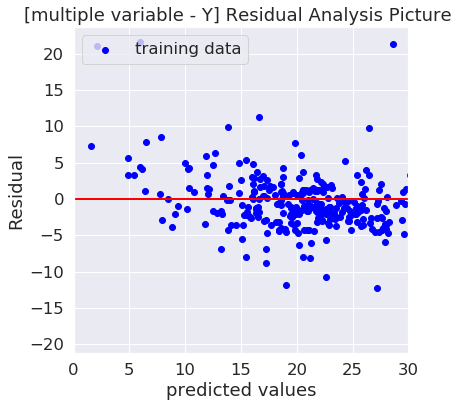

In [21]:
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


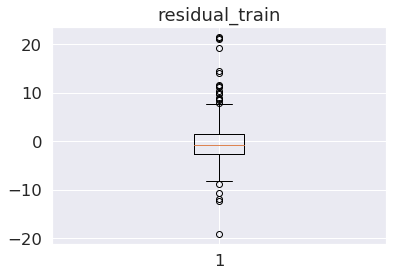

In [22]:
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

In [23]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
print(y_pred_train.head(10))

496    14.781426
479    20.465009
288    25.425605
123    16.929959
497    19.503755
266    31.980498
495    18.798706
430    16.370737
411    16.197688
238    27.684079
dtype: float64


In [24]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
print(y_pred_test.head(10))

211    15.216098
63     24.960828
71     21.436381
276    34.797266
118    19.539599
111    26.872042
188    30.304511
180    36.643881
64     26.357833
205    22.583966
dtype: float64


### performance measure: MSE, MAE, MAPE, Rsquared

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 20.04, mse_test: 35.71


In [27]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 3.08, mae_test: 3.61


In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))



mape_train: 16.31, mape_test: 18.34


In [30]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.76, r2_test: 0.59


In [31]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train.head(10))
print(residual_test.head(10))


496   -4.918574
479   -0.934991
288    3.125605
123   -0.370041
497    1.203755
266    1.280498
495   -4.301294
430    1.870737
411   -1.002312
238    3.984079
dtype: float64
211   -4.083902
63    -0.039172
71    -0.263619
276    1.597266
118   -0.860401
111    4.072042
188    0.504511
180   -3.156119
64    -6.642167
205   -0.016034
dtype: float64


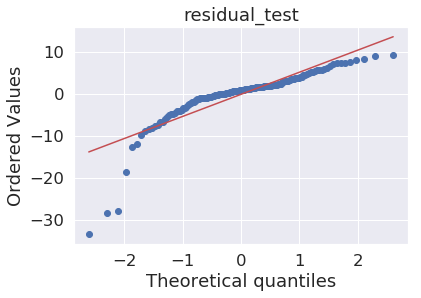

In [32]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

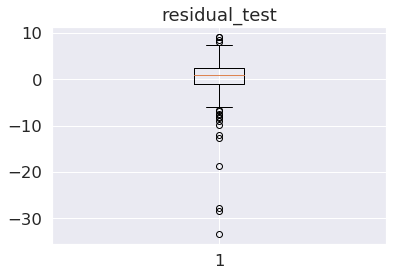

In [33]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

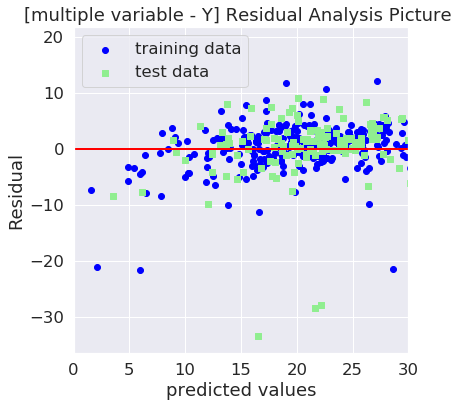

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


In [35]:
################## Multiple Linear Regression with Logarithm
y_train_log = pd.DataFrame(np.log(y_train))
#y_test_log = pd.DataFrame(np.log(y_test))

In [36]:
lm_log = sm.OLS(y_train_log, X_train)
lm_log_trained = lm_log.fit()

In [37]:
################## Multiple Linear Regression without Logarithm
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     743.4
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          3.73e-241
Time:                        21:29:59   Log-Likelihood:                -1032.9
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     341   BIC:                             2142.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0266      0.015     -1.750      0.081      -0.056       0.003
B              0.0135      0.003      4.710      0.000       0.008       0.019
RM             6.3903      0.335     19.085      0.000       5.732       7.049
CRIM          -0.0962      0.033     -2.904      0.004      -0.161      -0.031
DIS           -1.0398      0.222     -4.693      0.000      -1.476      -0.604
INDUS         -0.0518      0.070     -0.743      0.458      -0.189       0.085
LSTAT         -0.3090      0.057     -5.380      0.000      -0.422      -0.196
NOX           -2.4536      3.829     -0.641      0.522      -9.985       5.078
PTRATIO       -0.4589      0.123     -3.718      0.000      -0.702      -0.216
RAD            0.1353      0.074      1.835      0.067      -0.010       0.280
ZN             0.0328      0.016      2.046      0.042       0.001       0.064
TAX           -0.0094      0.004     -2.150      0.032      -0.018      -0.001
CHAS           1.3111      1.004      1.306      0.193      -0.664       3.286
==============================================================================
Omnibus:                      110.630   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.687
Skew:                           1.230   Prob(JB):                    7.15e-120
Kurtosis:                       8.581   Cond. No.                     8.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# prediction with logarithm
y_pred_train_log = lm_log_trained.predict(X_train)
y_pred_train_log_exp = np.exp(y_pred_train_log)

y_pred_test_log = lm_log_trained.predict(X_test)
y_pred_test_log_exp = np.exp(y_pred_test_log)


In [39]:
# MSE: Mean of Squared error
mse_train_log_exp = mean_squared_error(y_train, y_pred_train_log_exp)
mse_test_log_exp = mean_squared_error(y_test, y_pred_test_log_exp)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train_log_exp,mse_test_log_exp))

mse_train: 23.29, mse_test: 39.96


## scikit-learng 라이브러리를 활용한 선형회귀분석 함수 정의하기

다음으로는 동일한 과정을 scikit-learn에서 제공하는 linear_model 모듈을 이용해서 선형회귀분석을 수행해보겠습니다.
각 함수명은 다르지만 모두 동일한 과정을 통해서 모델을 적합하고, 예측을 수행하게 됩니다.

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

### 학습데이터 정의
보스턴 데이터에서 6개의 변수만을 사용해서  실습을 해보도록 하겠습니다.


In [41]:
boston_x = boston_data.iloc[:,:5]
boston_y = boston_target

In [42]:
print( boston_x[:10] )
print( boston_y[:10] )

     AGE       B     RM     CRIM     DIS
0   65.2  396.90  6.575  0.00632  4.0900
1   78.9  396.90  6.421  0.02731  4.9671
2   61.1  392.83  7.185  0.02729  4.9671
3   45.8  394.63  6.998  0.03237  6.0622
4   54.2  396.90  7.147  0.06905  6.0622
5   58.7  394.12  6.430  0.02985  6.0622
6   66.6  395.60  6.012  0.08829  5.5605
7   96.1  396.90  6.172  0.14455  5.9505
8  100.0  386.63  5.631  0.21124  6.0821
9   85.9  386.71  6.004  0.17004  6.5921
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: Target, dtype: float64


In [43]:
from sklearn.metrics import mean_squared_error

### 모델 학습(fitting) & 예측(predict)

In [44]:
LR.fit(X=boston_x,y=boston_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
boston_mse = mean_squared_error(y_true= boston_y, y_pred= LR.predict(boston_x))

In [46]:
print( "Training Mean_Squared_Error is : {}".format( round(boston_mse,4)))

print( "Training RMSE is :{}".format( round(np.sqrt(boston_mse),4)))

Training Mean_Squared_Error is : 33.7499
Training RMSE is :5.8095


### **<ToyotaCorolla 데이터를 활용한 회귀분석 실습>**

ToyotaCorolla : https://github.com/oniun/toyota_corolla_regression


<img src='./fig/22.png'>

### 데이터 불러오기

In [47]:
# 데이터 불러오기
corolla = pd.read_csv("./data/toyotacorolla.csv")
print(corolla.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

### 데이터 관측치 갯수(nCar)와 변수의 수(nVar) 확인

In [48]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


# 데이터 전처리

## 범주형 변수를 이진형 변수로 변환

In [49]:
# 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [50]:

# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [51]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

## 불필요한 변수 제거 및 가변수 추가

In [52]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [53]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 

In [54]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


# 선형회귀모형 모델링 y = f(x)

In [55]:
# Train the MLR
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

## 학습에 유의미한 변수확인

|Element|Description|
|:----|:-----------|
|Dep. Variable |	Which variable is the response in the model|
|Model|	What model you are using in the fit|
|Method|	How the parameters of the model were calculated|
|No. Observations|	The number of observations (examples)|
|DF Residuals|	Degrees of freedom of the residuals. Number of observations – number of parameters|
|DF Model|	Number of parameters in the model (not including the constant term if present)|
|R-squared|	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj. R-squared|	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic|	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals|
|Prob (F-statistic)|	The probability that you would get the above statistic, given the null hypothesis that they are unrelated|
|Log-likelihood|	The log of the likelihood function.|
|AIC|	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.|
|BIC|	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.|


|Element|Description|
|:----|:-----------|
|coef|	The estimated value of the coefficient|
|std err|	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t	|The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > ㅣtㅣ|	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|
|[95.0% Conf. Interval]|The lower and upper values of the 95% confidence interval|

|Element|Description|
|:----|:-----------|
|Skewness|	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).|
|Kurtosis|	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).|
|Omnibus|	D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis.|
|Prob(Omnibus)|	The above statistic turned into a probability|
|Jarque-Bera|	A different test of the skewness and kurtosis|
|Prob (JB)|	The above statistic turned into a probability|
|Durbin-Watson|	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis|
|Cond. No|	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).|

In [56]:
fitted_full_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     297.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:30:00   Log-Likelihood:                -8461.0
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     971   BIC:                         1.716e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -202.4540    137.381     -1.474      0.141    -472.052      67.144
Age_08_04         -119.6512      4.153    -28.808      0.000    -127.802    -111.501
Airbag_1           126.9969    295.899      0.429      0.668    -453.679     707.673
Airbag_2          -118.6408    141.548     -0.838      0.402    -396.415     159.133
Airco              225.2949     95.485      2.359      0.018      37.915     412.675
Automatic          530.3615    156.958      3.379      0.001     222.347     838.376
Automatic_airco   2340.4302    198.211     11.808      0.000    1951.459    2729.402
BOVAG_Guarantee    439.3210    137.858      3.187      0.001     168.787     709.855
Backseat_Divider   -56.5628    139.908     -0.404      0.686    -331.120     217.994
Boardcomputer     -395.3939    123.287     -3.207      0.001    -637.333    -153.454
CD_Player          188.3535    106.878      1.762      0.078     -21.385     398.092
CNG              -1953.8109    279.928     -6.980      0.000   -2503.145   -1404.477
Central_Lock        31.0129    160.947      0.193      0.847    -284.832     346.857
Cylinders           -0.0273      0.002    -11.292      0.000      -0.032      -0.023
Diesel            1696.6253    319.678      5.307      0.000    1069.286    2323.965
Doors              100.2012     43.590      2.299      0.022      14.660     185.743
Gears              -43.4054    203.815     -0.213      0.831    -443.374     356.563
Guarantee_Period    75.9339     14.803      5.130      0.000      46.884     104.984
HP                  53.5088      5.942      9.005      0.000      41.848      65.170
KM                  -0.0162      0.001    -11.832      0.000      -0.019      -0.014
Met_Color           21.1158     80.463      0.262      0.793    -136.785     179.016
Metallic_Rim       256.9483    102.169      2.515      0.012      56.451     457.446
Mfg_Month          -90.6048     10.989     -8.245      0.000    -112.169     -69.041
Mfg_Year             3.8468      0.892      4.314      0.000       2.097       5.597
Mfr_Guarantee      191.5132     78.667      2.434      0.015      37.136     345.891
Mistlamps            8.5371    114.245      0.075      0.940    -215.658     232.733
Petrol             257.1788    242.729      1.060      0.290    -219.155     733.513
Power_Steering    -330.0358    335.284     -0.984      0.325    -988.000     327.929
Powered_Windows    346.9541    160.822      2.157      0.031      31.355     662.553
Quarterly_Tax       14.8799      1.929      7.713      0.000      11.094      18.666
Radio             -465.0620    816.893     -0.569      0.569   -2068.142    1138.018
Radio_cassette     442.7284    819.165      0.540      0.589   -1164.809    2050.266
Sport_Model        370.3652     92.700      3.995      0.000     188.450     552.280
Tow_Bar           -117.

## **<그래프로 모델링 적합성 확인>**

### 잔차들을 그래프를 통해서 정규분포여부를 확인해보자

<img src='./fig/16.png'>

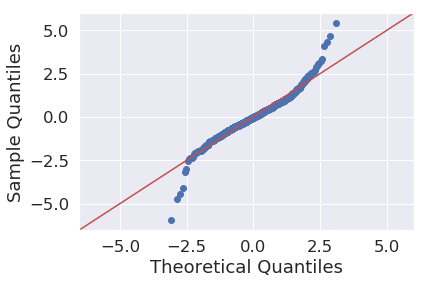

In [57]:
# 학습데이터의 잔차 확인
pred_y = fitted_full_model.predict(train_x)
res = fitted_full_model.resid  # residual

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

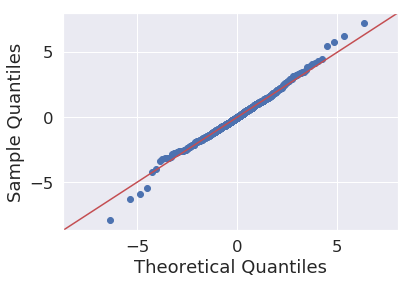

In [58]:
# 학습데이터의 잔차 확인
pred_y = fitted_full_model.predict(train_x)
res = fitted_full_model.resid  # residual

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, stats.t, fit=True, line='45')

### 이상관측치탐색

* Residuals: Y에서 벗어나는 정도
* Leverage: X에서 벗어나는 정도 

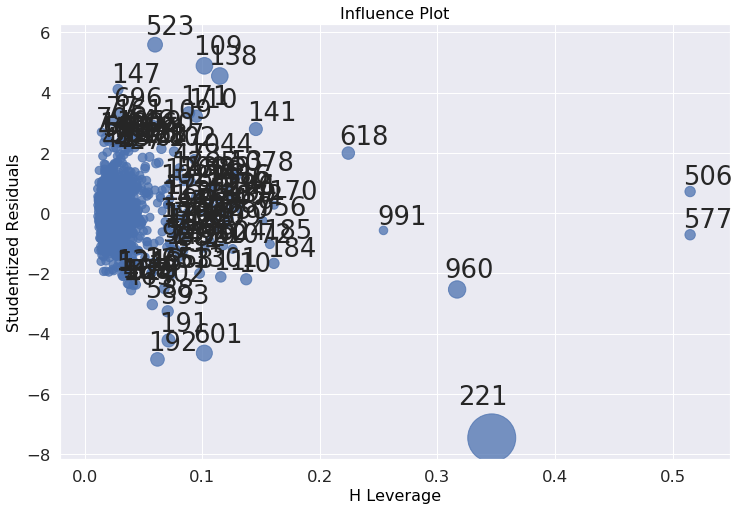

In [59]:
# Cook's distance with high leverage
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fitted_full_model, ax=ax, criterion="cooks", s=2)

### 잔차패턴확인

Text(0, 0.5, 'Residual')

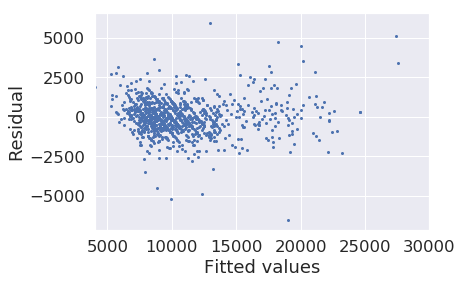

In [60]:
# residual pattern 확인
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

# 변수선택법

### processSubset: 해당 feature_set에 대한 모델생성 및 AIC 계산

In [61]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe298325278>, 'AIC': 19087.157001523432}


### getBest: 가장 높은 AIC를 가지는 모델 선택 및 저장

In [62]:
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.7169020175933838 seconds.
AIC                                                17749.5
model    <statsmodels.regression.linear_model.Regressio...
Name: 67, dtype: object


### 변수조합에 따른 모델링 시간

In [63]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.0385432243347168 seconds.
Processed  630 models on 2 predictors in 0.7257626056671143 seconds.
Processed  7140 models on 3 predictors in 8.997419834136963 seconds.
Total elapsed time: 9.817677736282349 seconds.


In [64]:
models

,AIC,model
1,19181.920243,<statsmodels.regression.linear_model.Regressio...
2,17749.459401,<statsmodels.regression.linear_model.Regressio...
3,17513.372800,<statsmodels.regression.linear_model.Regressio...


## 모델평가 지표

In [65]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.968e+04
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:30:12   Log-Likelihood:                -8753.7
No. Observations:                1005   AIC:                         1.751e+04
Df Residuals:                    1002   BIC:                         1.753e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -122.0081      2.720    -44.849      0.000    -127.347    -116.670
KM            -0.0240      0.001    -16.366      0.000      -0.027      -0.021
Weight        17.8840      0.127    140.733      0.000      17.635      18.133
==============================================================================
Omnibus:                      147.992   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.008
Skew:                          -0.285   Prob(JB):                         0.00
Kurtosis:                       8.976   Cond. No.                     4.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# 모든 변수들 모델링 한것보다 나은 결과를 가져옴
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

selected model Rsquared:  0.98331
selected model AIC:  17513.37280
selected model MSE:  129014650.45174


Text(0, 0.5, 'BIC')

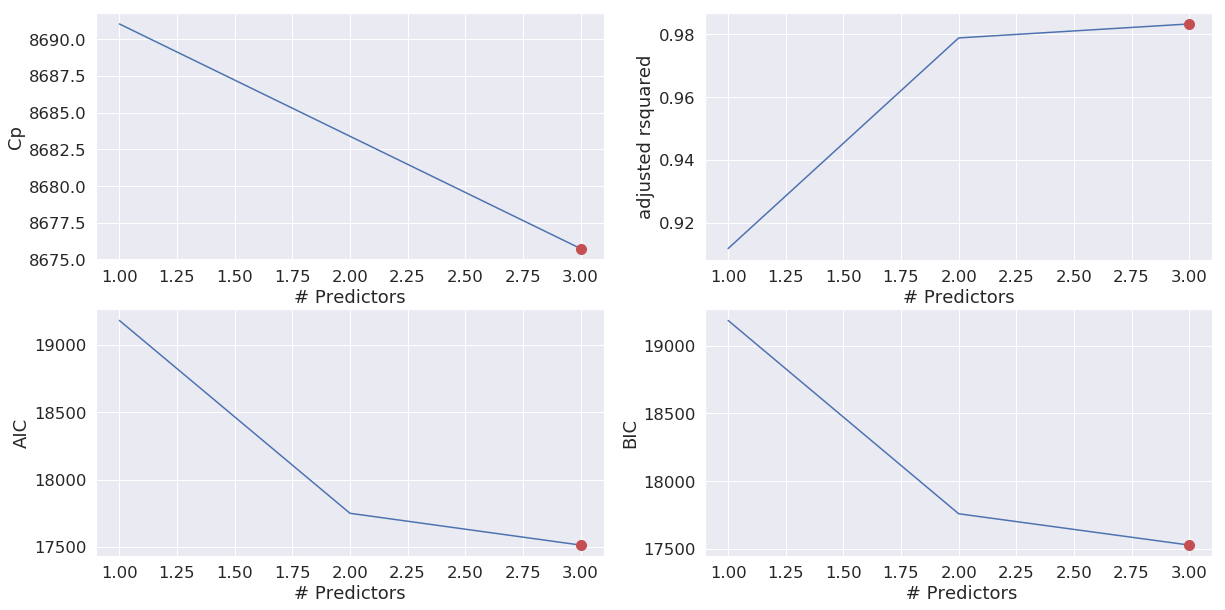

In [67]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

## **전진선택법**

### forward: 전진선택법 (step=1)

In [68]:
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

### forward_model: 전진선택법 모델

In [69]:
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [70]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.06038260459899902
Selected predictors: ['Mfg_Year', 'const']  AIC: 17833.30553227824
Processed  35 models on 2 predictors in 0.040457963943481445
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17586.744100025662
Processed  34 models on 3 predictors in 0.03885388374328613
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: 17460.526247025038
Processed  33 models on 4 predictors in 0.03999972343444824
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: 17353.123124893456
Processed  32 models on 5 predictors in 0.03928065299987793
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'const']  AIC: 17192.921581019895
Processed  31 models on 6 predictors in 0.042967796325683594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'const']  AIC: 17165.38758714056
Processed  30 models on 7 predictors in 0.0542051792

In [71]:
Forward_best_model.aic

16972.719613484085

## **후진소거법**

### backward: 후진소거법(step=1)

In [72]:
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

### backward: 후진소거법모델

In [73]:
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [74]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.08927321434020996
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: 16987.91637727194
Processed  35 models on 34 predictors in 0.06692719459533691
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windo

In [75]:
Backward_best_model.aic

16972.71961348411

## **단계적 선택법**

### stepwise_model: 단계적 선택법 모델

In [76]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [77]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.03901839256286621
Selected predictors: ['Mfg_Year', 'const']  AIC: 17833.30553227824
forward
Processed  1 models on 0 predictors in 0.0015993118286132812
Selected predictors: ['const']  AIC: 19343.02199889685
Processed  35 models on 2 predictors in 0.039319515228271484
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17586.744100025662
forward
Processed  2 models on 1 predictors in 0.00324249267578125
Selected predictors: ['Mfg_Year', 'const']  AIC: 17833.30553227824
Processed  34 models on 3 predictors in 0.03864479064941406
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: 17460.526247025038
forward
Processed  3 models on 2 predictors in 0.004409313201904297
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17586.744100025662
Processed  33 models on 4 predictors in 0.039452314376831055
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: 17353.12312489

In [78]:
Stepwise_best_model.aic

16972.719613484085

# **성능평가**

In [79]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (23,) (24,)


In [80]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [81]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [82]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [83]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   7.56418e+06  7.90926e+06  7.90926e+06  7.90926e+06
RMSE      2750.31      2812.34      2812.34      2812.34
MAE       923.469      929.928      929.928      929.928
MAPE       8.7147      8.76357      8.76357      8.76357
